# Qiskit Terra
#### A solid foundation for quantum computing
Abraham Asfaw (abraham.asfaw@ibm.com)

In [23]:
import qiskit
qiskit.__qiskit_version__

{'qiskit': '0.11.0',
 'qiskit-aer': '0.2.3',
 'qiskit-aqua': '0.5.2',
 'qiskit-ibmq-provider': '0.3.0',
 'qiskit-ignis': '0.1.1',
 'qiskit-terra': '0.8.2'}

In [24]:
# Use the lines below to install qiskit if you don't have it already
# !pip install qiskit==0.11.0
# !pip install qiskit-terra[visualization]

Contents
0. Introduction
1. Building the quantum circuit
1. Using subcircuits
1. Running the circuit on a simulator
1. Plotting results
1. Running the circuit on a real superconducting device
1. Getting backend information
1. Execution of quantum programs

# 0. Introduction

In this notebook, we will be discussing how to use Qiskit Terra to build and execute the [Bernstein-Vazirani quantum algorithm](https://quantum-computing.ibm.com/support/guides/quantum-algorithms-with-qiskit?page=5cb997c574a4010049e1a293#).
![Circuit for Bernstein-Vazirani Algorithm with s = 1101](https://raw.githubusercontent.com/aasfaw/qiskit-intros/master/bv_asfaw.png)
<center>Quantum circuit for the Bernstein-Vazirani algorithm with s = '1101'</center>

# 1. Building the quantum circuit

In [25]:
from qiskit import QuantumRegister, ClassicalRegister, QuantumCircuit

In [26]:
qr = QuantumRegister(5, 'q')
cr = ClassicalRegister(5, 'c')
circuit = QuantumCircuit(qr, cr)

In [27]:
circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])

circuit.x(qr[4])
circuit.h(qr[4])

circuit.barrier()

circuit.cx(qr[0], qr[4])
circuit.cx(qr[2], qr[4])
circuit.cx(qr[3], qr[4])

circuit.barrier()

circuit.h(qr[0])
circuit.h(qr[1])
circuit.h(qr[2])
circuit.h(qr[3])
circuit.h(qr[4])

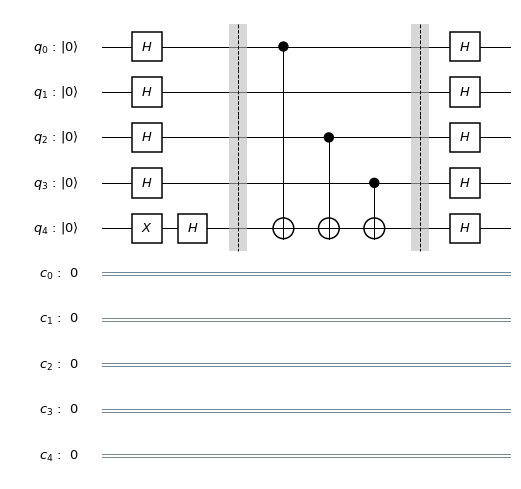

In [28]:
%matplotlib inline
circuit.draw(output='mpl')

In [29]:
circuit.measure(qr, cr)

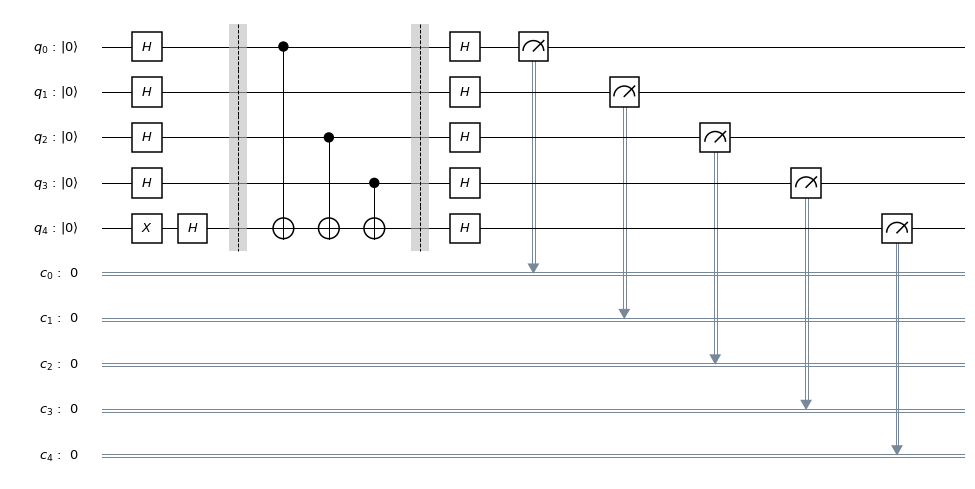

In [30]:
circuit.draw(output='mpl')

# 2. Using Subcircuits

### 2.1 H gates

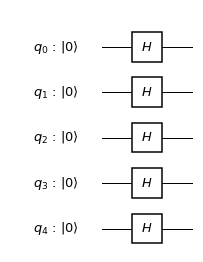

In [31]:
subcircuit_hadamards = QuantumCircuit(5, name='H')
subcircuit_hadamards.h([0,1,2,3,4])

subcircuit_hadamards.draw(output='mpl')

### 2.2 Oracle

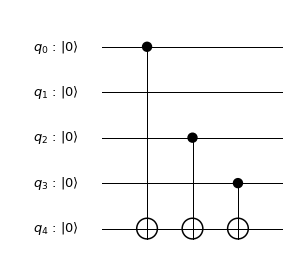

In [32]:
subcircuit_oracle = QuantumCircuit(5, name='Oracle')

subcircuit_oracle.cx(0, 4)
subcircuit_oracle.cx(2, 4)
subcircuit_oracle.cx(3, 4)

subcircuit_oracle.draw(output='mpl')

### 2.3 Bringing it all together

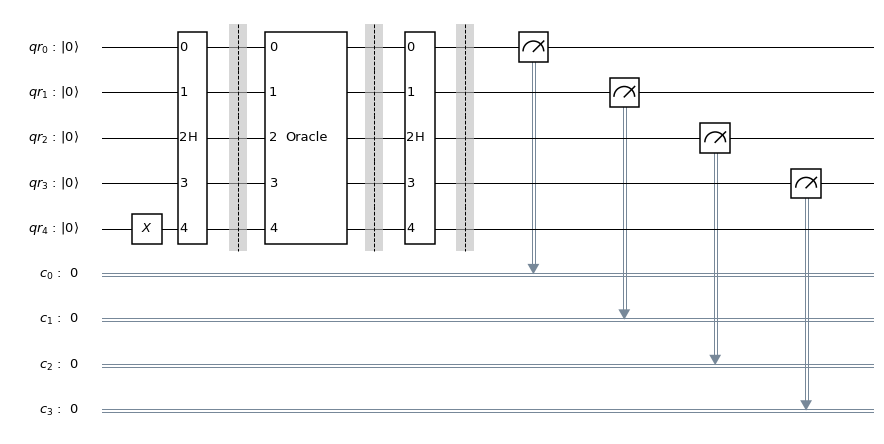

In [33]:
qr = QuantumRegister(5, 'qr')
cr = ClassicalRegister(4, 'c')
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[4])
circuit.append(subcircuit_hadamards.to_instruction(), qr[:])
circuit.barrier()
circuit.append(subcircuit_oracle.to_instruction(), qr[:])
circuit.barrier()
circuit.append(subcircuit_hadamards.to_instruction(), qr[:])
circuit.barrier()
circuit.measure(qr[0:4], cr)

circuit.draw(output='mpl')

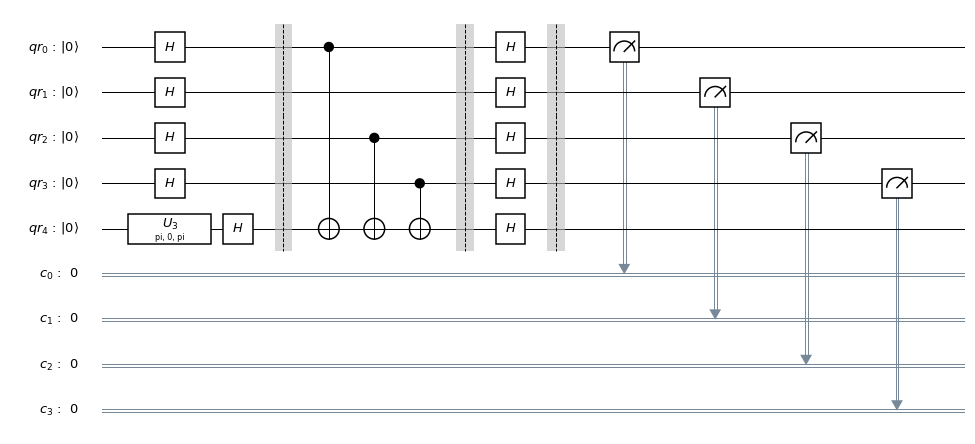

In [34]:
circuit.decompose().draw(output='mpl')

### 2.4 Python + Qiskit

In [35]:
s = '1101'

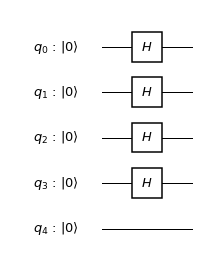

In [36]:
subcircuit_hadamards = QuantumCircuit(len(s)+1, name='H')
subcircuit_hadamards.h(range(len(s)))

subcircuit_hadamards.draw(output='mpl')

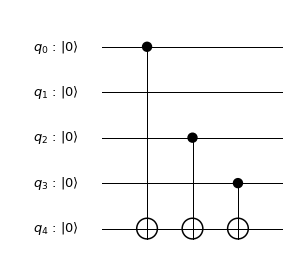

In [37]:
subcircuit_oracle = QuantumCircuit(len(s)+1, name='Oracle')

for ii, s_ in enumerate(reversed(s)):
    if int(s_): subcircuit_oracle.cx(ii, len(s))

subcircuit_oracle.draw(output='mpl')

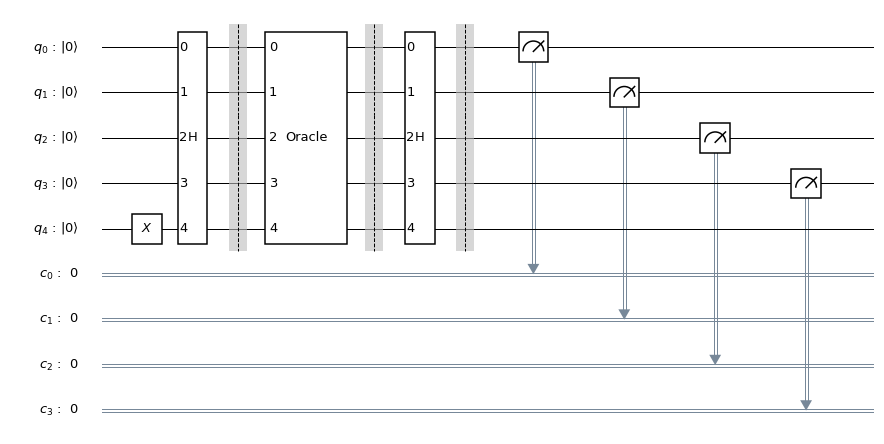

In [38]:
qr = QuantumRegister(len(s)+1, 'q')
cr = ClassicalRegister(len(s), 'c')
circuit = QuantumCircuit(qr, cr)

circuit.x(qr[-1])
circuit.append(subcircuit_hadamards.to_instruction(), qr[:])
circuit.barrier()
circuit.append(subcircuit_oracle.to_instruction(), qr[:])
circuit.barrier()
circuit.append(subcircuit_hadamards.to_instruction(), qr[:])
circuit.barrier()
circuit.measure(qr[0:-1], cr)

circuit.draw(output='mpl')

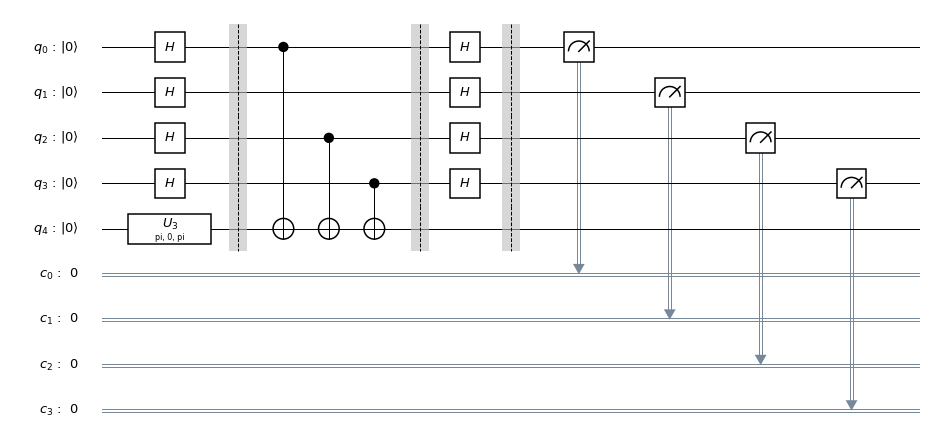

In [39]:
circuit.decompose().draw(output='mpl')

# 3. Running the circuit on a simulator

In [40]:
from qiskit import BasicAer

In [41]:
BasicAer.backends()

[<QasmSimulatorPy('qasm_simulator') from BasicAer()>,
 <StatevectorSimulatorPy('statevector_simulator') from BasicAer()>,
 <UnitarySimulatorPy('unitary_simulator') from BasicAer()>]

In [42]:
simulator = BasicAer.get_backend('qasm_simulator')

In [43]:
from qiskit import execute

In [44]:
sim_job = execute(circuit, backend = simulator, shots = 100, seed=514307977)

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\compiler\assemble.py:151: DeprecationWarning: seed is deprecated in favor of seed_simulator.
  warnings.warn('seed is deprecated in favor of seed_simulator.', DeprecationWarning)


# 4. Plotting results

In [45]:
sim_results = sim_job.result()

In [46]:
print(sim_results)

Result(backend_name='qasm_simulator', backend_version='2.0.0', header=Obj(backend_name='qasm_simulator', backend_version='2.0.0'), job_id='ee085a0d-bb36-4cc7-9bb0-f36a87645f2f', qobj_id='9011ad2e-b6e1-49ee-97ae-00263b2d3cd1', results=[ExperimentResult(data=ExperimentResultData(counts=Obj(0x0=50, 0xd=50)), header=Obj(clbit_labels=[['c', 0], ['c', 1], ['c', 2], ['c', 3]], creg_sizes=[['c', 4]], memory_slots=4, n_qubits=5, name='circuit21', qreg_sizes=[['q', 5]], qubit_labels=[['q', 0], ['q', 1], ['q', 2], ['q', 3], ['q', 4]]), meas_level=2, name='circuit21', seed=514307977, shots=100, status='DONE', success=True, time_taken=0.003989696502685547)], status='COMPLETED', success=True, time_taken=0.004987478256225586)


In [47]:
sim_counts = sim_results.get_counts(circuit)

In [48]:
from qiskit.tools.visualization import plot_histogram

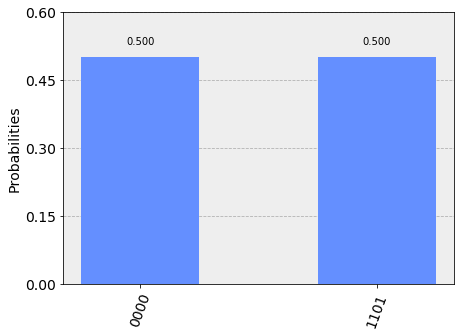

In [49]:
plot_histogram(sim_counts)

# 5. Running the circuit on a real superconducting device

In [50]:
from qiskit import IBMQ
IBMQ.load_account()

<AccountProvider for IBMQ(hub='ibm-q', group='open', project='main')>

In [51]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmqx4')
#backend = provider.get_backend('ibmq_20_tokyo')

In [51]:
#provider = IBMQ.get_provider(hub='ibm-q-hub-ntu')
#backend = provider.get_backend('ibmq_poughkeepsie')
#backend = provider.get_backend('ibmq_20_tokyo')

In [52]:
device_job = execute(circuit, backend=backend, shots=1024)

In [53]:
from qiskit.tools.monitor import job_monitor
print(device_job.job_id())
job_monitor(device_job, monitor_async=True)

5d496fdf6842310011a013a3


HTML(value="<p style='font-size:16px;'>Job Status: job is actively running </p>")

In [56]:
device_job = backend.retrieve_job('5d496fdf6842310011a013a3')
device_results = device_job.result()

{'1100': 61, '1001': 41, '0101': 68, '0110': 14, '0000': 228, '1010': 11, '1011': 19, '1111': 49, '0100': 42, '1110': 32, '0111': 20, '0011': 17, '1000': 71, '0001': 42, '0010': 36, '1101': 273}


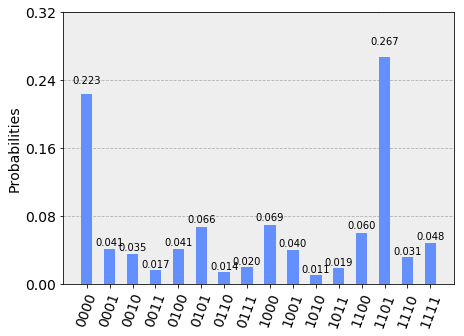

In [57]:
device_counts = device_results.get_counts(circuit)
print(device_counts)
plot_histogram(device_counts)

### 5.1 Results of each shot instead of counts

In [58]:
device_shots_job = execute(circuit, backend=backend, shots=1024, memory=True)
job_monitor(device_shots_job, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is being initialized </p>")

In [59]:
print(device_shots_job.job_id())

5d49703a48b1d1001166a4f9


In [60]:
job_monitor(device_shots_job, monitor_async=True)

HTML(value="<p style='font-size:16px;'>Job Status: job is actively running </p>")

In [62]:
device_shots_job = backend.retrieve_job('5d49703a48b1d1001166a4f9')
device_shots_results = device_shots_job.result()
shots = device_shots_results.get_memory(circuit)
print(shots)

['0110', '1001', '1101', '0000', '0000', '1011', '0000', '0010', '0000', '1110', '1110', '0000', '1110', '1110', '1110', '1101', '0000', '1100', '0100', '0000', '1000', '1101', '1010', '0011', '1101', '1111', '0010', '0101', '0000', '0011', '1000', '1011', '1110', '1101', '1110', '0000', '0000', '1101', '0000', '0110', '0000', '0001', '1101', '0000', '1101', '0101', '0000', '1101', '1111', '1010', '1101', '1101', '1101', '1101', '1101', '1110', '0101', '0010', '0110', '1111', '0011', '1100', '0110', '0001', '1001', '1010', '1110', '0000', '0000', '1001', '1110', '1000', '1110', '0000', '1111', '1111', '1111', '1110', '1101', '1101', '0111', '1101', '0011', '0011', '0100', '0001', '1110', '1111', '1101', '0001', '0010', '0010', '0000', '0000', '1101', '1110', '0110', '1110', '0010', '1111', '1110', '0110', '0011', '1110', '1101', '0000', '1110', '0011', '0000', '0011', '1111', '1011', '0001', '0100', '1110', '1101', '1100', '0000', '1101', '1101', '0011', '0011', '0011', '1000', '0011',

### 5.2 Getting results from past jobs

In [63]:
device_job = backend.retrieve_job('5d49703a48b1d1001166a4f9') # counts

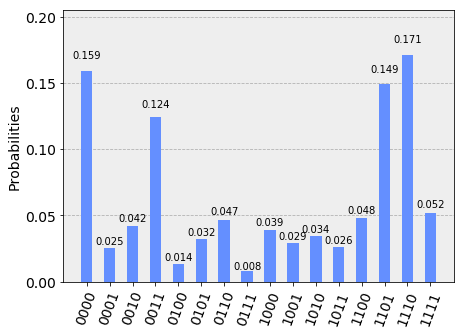

In [64]:
device_results = device_job.result()
device_counts = device_results.get_counts()
plot_histogram(device_counts)

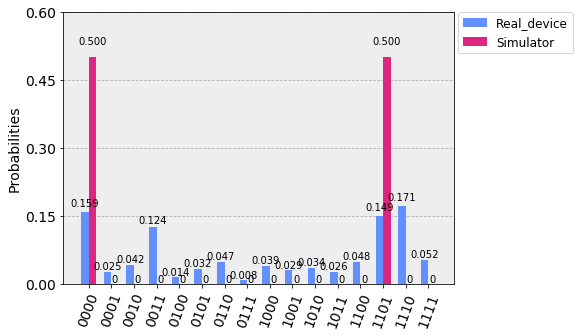

In [67]:
# Plot results with legend
legend = [ 'Real_device','Simulator']
plot_histogram([device_counts, sim_counts], legend=legend)

# 6. Getting backend information

In [68]:
from qiskit.tools.monitor import backend_overview, backend_monitor
backend_overview()

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


ibmq_poughkeepsie           ibmq_20_tokyo                ibmq_16_melbourne
-----------------           -------------                -----------------
Num. Qubits:  20            Num. Qubits:  20             Num. Qubits:  14
Pending Jobs: 0             Pending Jobs: 0              Pending Jobs: 0
Least busy:   True          Least busy:   False          Least busy:   False
Operational:  True          Operational:  True           Operational:  True
Avg. T1:      70.4          Avg. T1:      83.0           Avg. T1:      48.1
Avg. T2:      66.2          Avg. T2:      55.1           Avg. T2:      65.0



ibmqx2                       ibmqx4
------                       ------
Num. Qubits:  5              Num. Qubits:  5
Pending Jobs: 0              Pending Jobs: 0
Least busy:   False          Least busy:   False
Operational:  True           Operational:  True
Avg. T1:      62.2           Avg. T1:      44.7
Avg. T2:      56.2           Avg. T2:      17.1





In [69]:
backend_monitor(backend)

ibmq_poughkeepsie
Configuration
-------------
    n_qubits: 20
    operational: True
    status_msg: active
    pending_jobs: 1
    backend_version: 1.2.0
    basis_gates: ['u1', 'u2', 'u3', 'cx', 'id']
    local: False
    simulator: False
    sample_name: Hexbert
    rep_times: [1000]
    acquisition_latency: []
    meas_kernels: ['boxcar']
    conditional: False
    conditional_latency: []
    max_shots: 8192
    dt: 3.5555555555555554
    allow_q_circuit: False
    description: 20 qubit device Poughkeepsie
    backend_name: ibmq_poughkeepsie
    meas_levels: [1]
    online_date: 2018-08-29T04:00:00+00:00
    dtm: 3.5555555555555554
    hamiltonian: {'vars': {'J2_3': 0, 'J1_2': 0, 'J13_12': 0, 'wm12': 44.33831840161895, 'Omegam18': 0, 'J10_11': 0, 'J17_18': 0, 'J9_4': 0, 'Omegam10': 0, 'Omegad14': 0, 'J7_8': 0, 'wq10': 29.654704098876337, 'J3_4': 0, 'gm1': 0, 'Omegad4': 0, 'wq4': 29.29698458672855, 'wm7': 43.41160840358364, 'wm9': 43.36172020755434, 'J15_10': 0, 'J4_9': 0, 'Omegad12

In [70]:
from qiskit.tools.jupyter import backend_overview, backend_monitor

In [71]:
%qiskit_backend_overview

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [ ]:
%qiskit_backend_monitor ibmqx4

In [72]:
%qiskit_backend_monitor backend

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


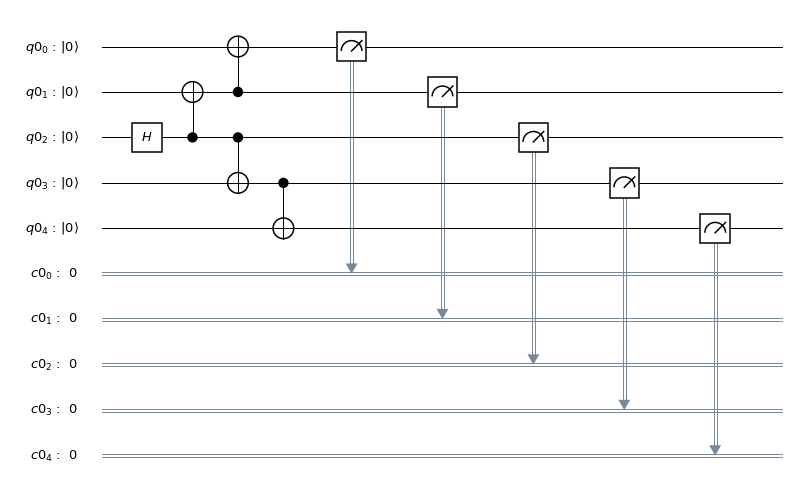

In [73]:
qr = QuantumRegister(5)
cr = ClassicalRegister(5)
circuit = QuantumCircuit(qr, cr)

circuit.h(qr[2])
circuit.cx(qr[2], qr[1])
circuit.cx(qr[1], qr[0])
circuit.cx(qr[2], qr[3])
circuit.cx(qr[3], qr[4])
circuit.measure(qr, cr)

circuit.draw(output='mpl')


In [74]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')
%qiskit_backend_monitor backend

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [75]:
layout_good = {qr[0]: 10, qr[1]: 4, qr[2]: 5, qr[3]: 6, qr[4]: 8}
from qiskit.compiler import transpile
circuit_mapped_good = transpile(circuit, backend, initial_layout = layout_good)

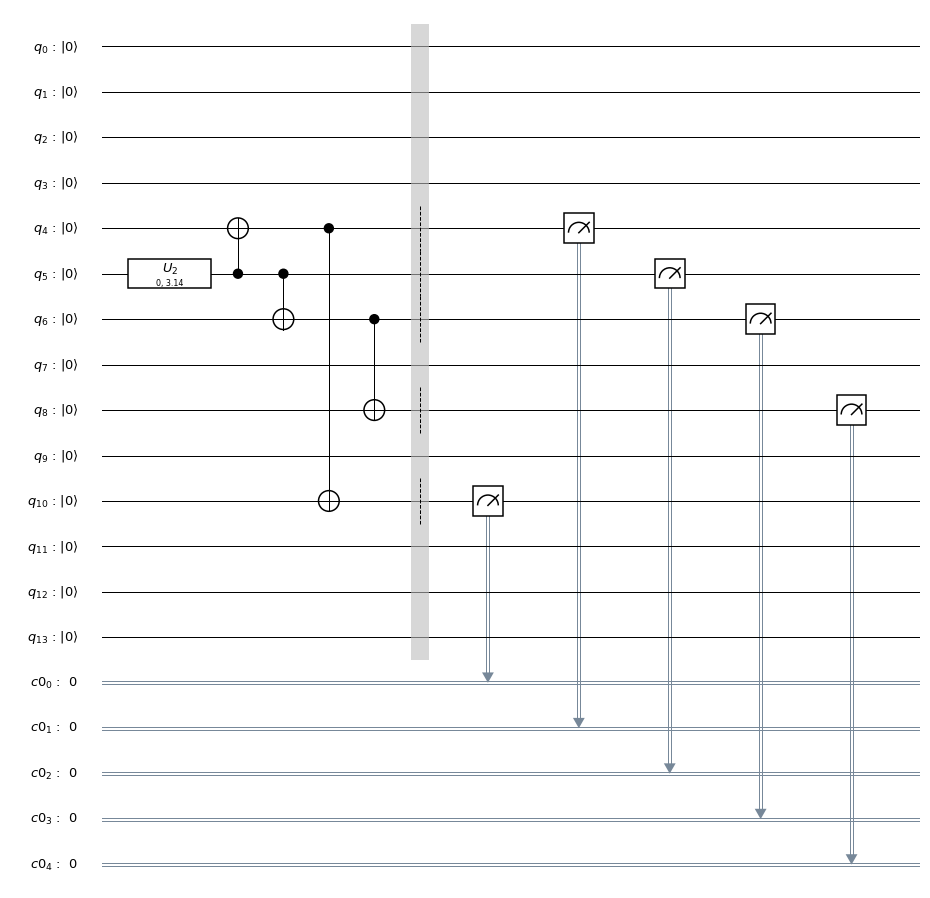

In [76]:
circuit_mapped_good.draw(output='mpl')

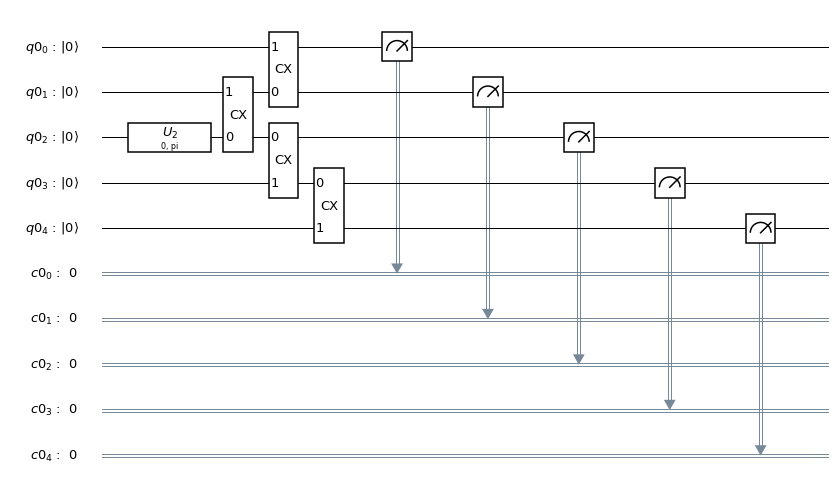

In [77]:
circuit.decompose().draw(output='mpl')

In [78]:
job = execute([circuit,circuit_mapped_good], backend=backend, shots=1024)

In [79]:
print(job.job_id())
job_monitor(job, monitor_async=True)

5d4974afdb3a0e0012bd0bf1


HTML(value="<p style='font-size:16px;'>Job Status: job is actively running </p>")

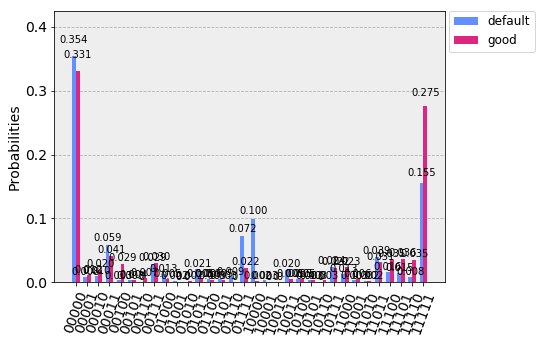

In [80]:
job = backend.retrieve_job('5d4974afdb3a0e0012bd0bf1')
results = job.result()
plot_histogram([results.get_counts(0), results.get_counts(1)], 
               legend=['default', 'good'])

# 7. Execution of quantum programs

Before circuits are executed, the transpiler converts them into the basis gate set for the relevant backend.

Key point: what you execute isn't exactly what you have drawn. The two circuits are ideally equivalent, but this is not generally true.

Definition of u1, u2, u3 gates: <br/>https://qiskit.org/documentation/terra/summary_of_quantum_operations.html

In [81]:
provider = IBMQ.get_provider(hub='ibm-q')
backend = provider.get_backend('ibmq_16_melbourne')

In [82]:
print(backend.configuration().basis_gates)

['u1', 'u2', 'u3', 'cx', 'id']


In [83]:
%qiskit_backend_monitor backend

C:\Users\HP\Anaconda3\envs\QISKitenv\lib\site-packages\qiskit\providers\ibmq\ibmqfactory.py:531: DeprecationWarning: IBMQ.backends() is being deprecated. Please use IBMQ.get_provider() to retrieve a provider and AccountProvider.backends() to find its backends.
  DeprecationWarning)


In [ ]:
gate_time_values()

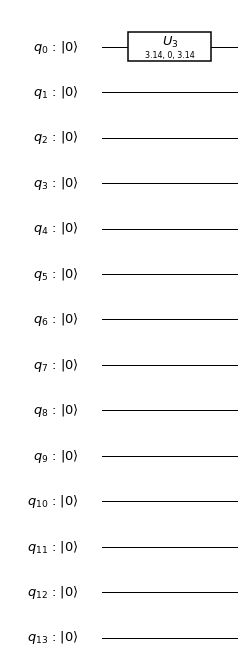

In [84]:
circuit = QuantumCircuit(1)
circuit.x(0)

transpiled = transpile(circuit, backend)
transpiled.draw(output='mpl')

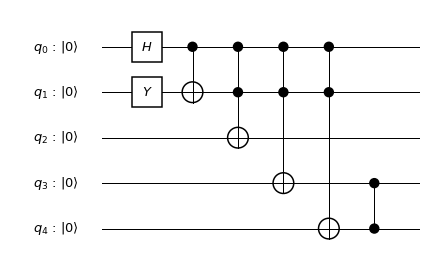

In [85]:
circuit = QuantumCircuit(5)
circuit.h(0)
circuit.y(1)
circuit.cx(0,1)
circuit.ccx(0,1,2)
circuit.ccx(0,1,3)
circuit.ccx(0,1,4)
circuit.cz(4,3)
circuit.draw(output='mpl')


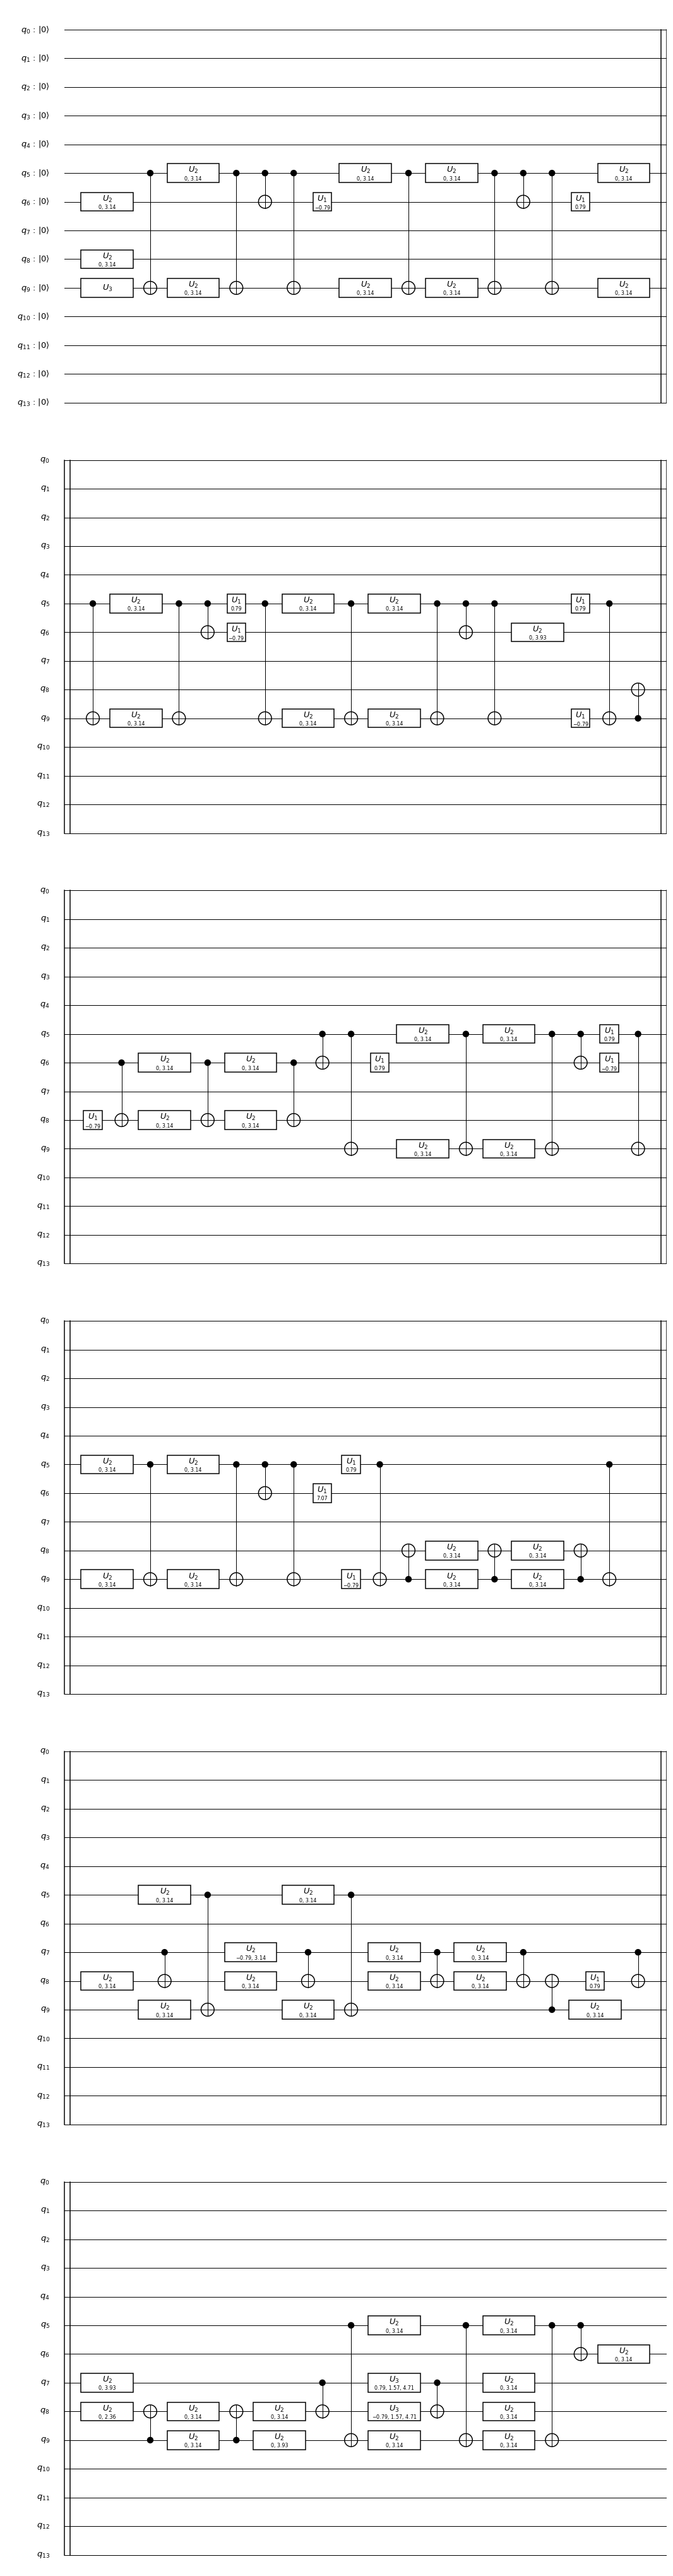

In [86]:
transpiled = transpile(circuit, backend)
transpiled.draw(output='mpl')

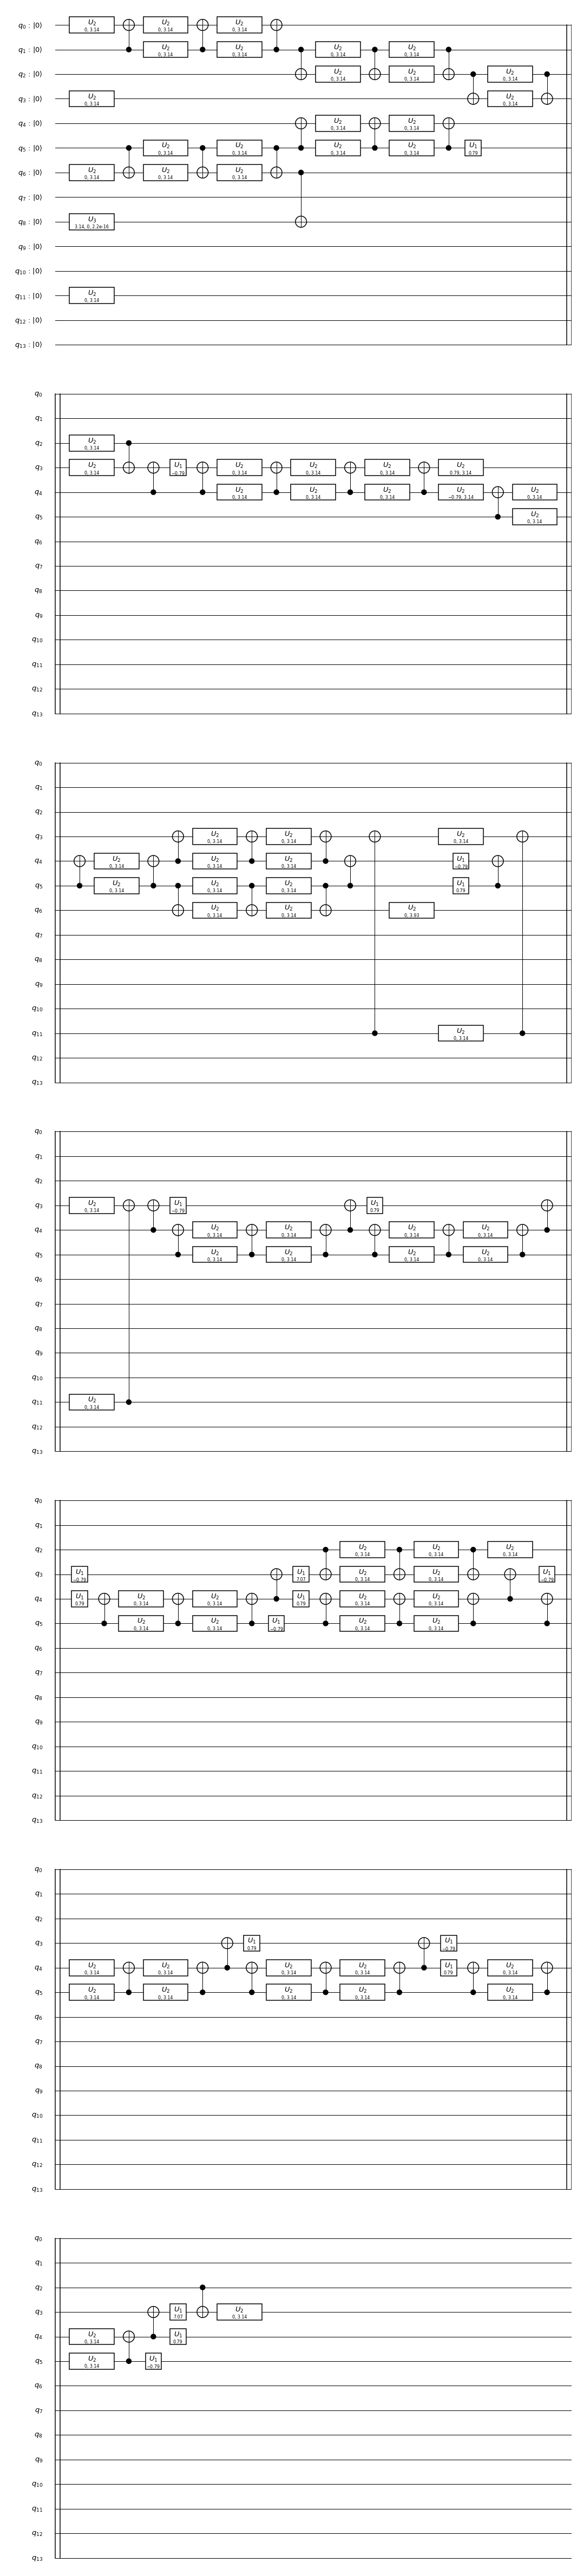

In [90]:
transpiled = transpile(circuit, backend, optimization_level=2)
transpiled.draw(output='mpl')